In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the data and label encoding

data = pd.read_csv('housing.csv')
data = data.sample(frac=0.1, random_state=42)


print(data.shape)
#https://www.kaggle.com/code/bhadaneeraj/housing-rent-prediction-using-catboost-regressor/notebook

(38498, 22)


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
def Encoder(df,columnsToEncode):   
  le = LabelEncoder()
  for feature in columnsToEncode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

df = pd.DataFrame(data)
Encoder(df,['region','type','laundry_options','parking_options','state'])
df = df.drop(['id','url','region_url','image_url','description','lat','long'], axis=1)
print(df.head())
print(df.shape)

        region  price  type  sqfeet  beds  baths  cats_allowed  dogs_allowed  \
144026     391   1750     0     936     2    1.0             1             0   
304025     206    850     0    1200     2    2.5             0             0   
23458      112   1500     0    1029     2    1.0             1             1   
100916     152    899     0     856     2    1.0             1             1   
225023      59    595     0     350     0    1.0             0             0   

        smoking_allowed  wheelchair_access  electric_vehicle_charge  \
144026                1                  0                        0   
304025                0                  0                        0   
23458                 0                  0                        0   
100916                1                  0                        0   
225023                0                  0                        0   

        comes_furnished  laundry_options  parking_options  state  
144026                0  

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(df)
labels = kmeans.predict(df)

# 从每个集群中随机选择 60% 的样本进行特征选择
sampled_data = pd.DataFrame()
for label in set(labels):
    cluster_data = df[labels == label]
    sampled_cluster_data = cluster_data.sample(frac=0.2, random_state=42)
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])
df = sampled_data

df.shape

D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(7699, 15)

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd

X = df.drop('price', axis=1)   # features


num_clusters = 5
min_samples_per_cluster = 20
enough_samples = False
prices = df['price']


while not enough_samples:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(prices.values.reshape(-1, 1))
    labels = kmeans.labels_

    # 统计每个簇的数据量
    unique_elements, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique_elements, counts))

    # 检查每个簇的样本数量
    clusters_to_remove = [cluster for cluster, count in cluster_counts.items() if count < min_samples_per_cluster]

    if len(clusters_to_remove) == 0:
        enough_samples = True
    else:
        # 删除低于阈值的簇中的所有样本
        indices_to_remove = [idx for idx, label in enumerate(labels) if label in clusters_to_remove]
        X = X.drop(X.index[indices_to_remove])
        prices = prices.drop(prices.index[indices_to_remove])

# 更新 Y 为最终的聚类结果

Y = kmeans.labels_ 

# 删除编码为0的数据
indices_to_remove = [idx for idx, label in enumerate(Y) if label==0]
X = X.drop(X.index[indices_to_remove])
Y = np.delete(Y, indices_to_remove)-1



print(X.shape)
print(Y.shape)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(Y_train.shape)
print(X_train.shape)

unique_elements, counts = np.unique(Y, return_counts=True)
for element, count in zip(unique_elements, counts):
    print(f"编码 {element}: 数据量 {count}")



D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(4890, 14)
(4890,)
(3912,)
(3912, 14)
编码 0: 数据量 462
编码 1: 数据量 2792
编码 2: 数据量 85
编码 3: 数据量 1551


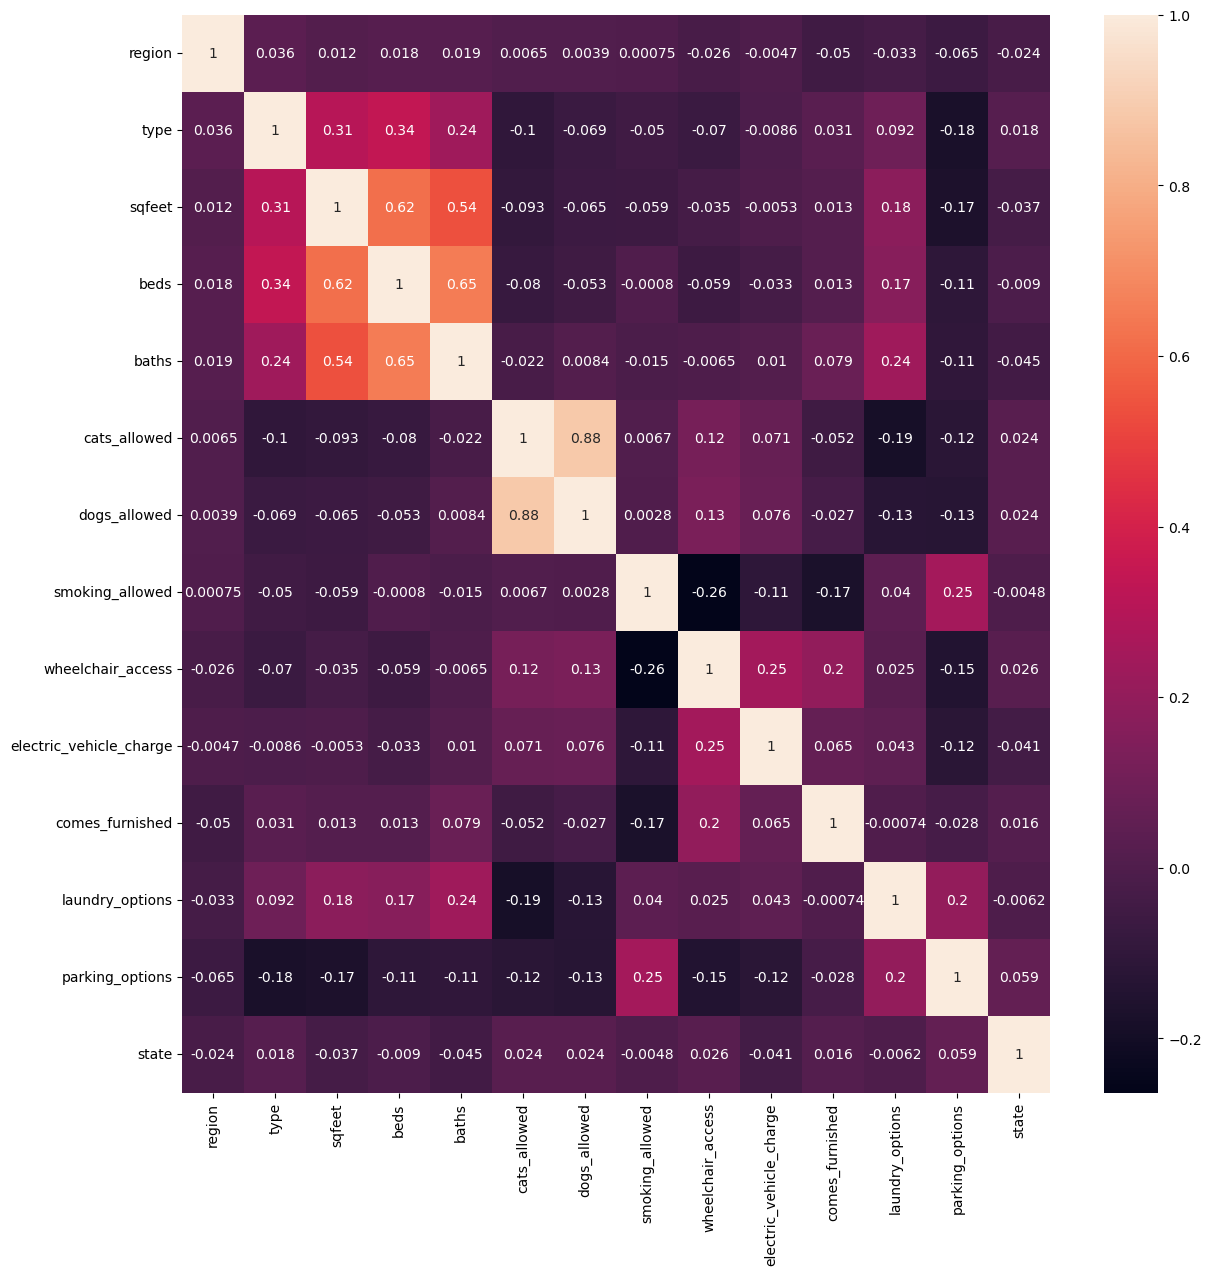

In [10]:
#相关性热力图
corr_datas=X.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_datas,annot=True)
plt.show()

# Feature Extraction


In [12]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import  validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [13]:
def double_plot(train_size,train_acc_mean,test_acc_mean,label):
#-----------------------------------
    plt.figure(figsize=(18, 6))
    plt.title("")
    plt.plot(train_size, train_acc_mean, 'o-',color='r',label='Training')
    plt.plot(train_size, test_acc_mean, 'o-',color='g',label='10k_Cross-validation')
    plt.xlabel('train_example',fontsize=16)
    plt.ylabel(label,fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    for a, b in zip(train_size, train_acc_mean):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)

    for a, b in zip(train_size, test_acc_mean):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    plt.legend(loc='best')
    plt.show()

# 特征筛选

In [14]:
# remove features with low variance

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
a_newx=sel.fit_transform(X_train)
a_newvx=sel.transform(X_val)
a_newx.shape,a_newvx.shape



((3912, 11), (978, 11))

In [15]:
# feature selection based on L1-norm
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
newx=X_train
newvx=X_val
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(newx, Y_train)
model = SelectFromModel(lsvc, prefit=True)
b_newx = model.transform(newx)
b_newvx = model.transform(newvx)
b_newx.shape,b_newvx.shape

D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((3912, 10), (978, 10))

In [16]:
# feature selection based on Tree
from sklearn.ensemble import ExtraTreesClassifier
newx=X_train
newvx=X_val
clf = ExtraTreesClassifier()
clf = clf.fit(newx, Y_train)
model = SelectFromModel(clf, prefit=True)
c_newx = model.transform(newx)
c_newvx=model.transform(newvx)
c_newx.shape,c_newvx.shape,clf.feature_importances_

D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((3912, 6),
 (978, 6),
 array([0.16229559, 0.03948285, 0.17634855, 0.06106325, 0.07411919,
        0.01890615, 0.0190703 , 0.02675954, 0.01355676, 0.00963041,
        0.01741264, 0.10073419, 0.09157861, 0.18904197]))

Selected features: Index(['region', 'sqfeet', 'baths', 'laundry_options', 'state'], dtype='object')


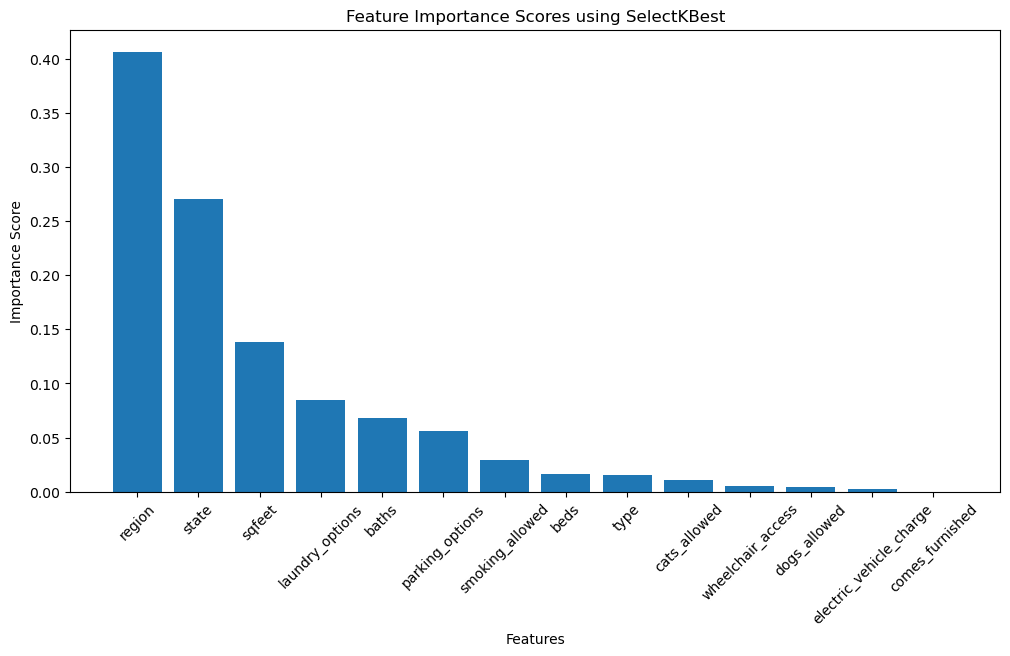

In [18]:
# Select K best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
newx=X_train
newvx=X_val
#sb=SelectKBest(chi2, k=7)
sb=SelectKBest(mutual_info_classif, k=5)
d_newx=sb.fit_transform(X_train, Y_train)
d_newvx=sb.transform(newvx)
d_newx.shape,d_newvx.shape

# Get the boolean array of selected features
selected_features_mask = sb.get_support()

# Get the column names of the original dataset
column_names = X_train.columns

# Retrieve the names of the selected features
selected_features = column_names[selected_features_mask]

# Print the names of the selected features
print("Selected features:", selected_features)

# 获取特征得分
feature_scores = sb.scores_

# 获取特征名称
feature_names = list(X_train.columns)

# 将特征名称与对应的得分组合在一起
feature_score_pairs = list(zip(feature_names, feature_scores))

# 根据得分对特征进行排序（降序）
sorted_feature_score_pairs = sorted(feature_score_pairs, key=lambda x: x[1], reverse=True)

# 将排序后的特征名称和得分拆分回单独的列表
sorted_feature_names, sorted_feature_scores = zip(*sorted_feature_score_pairs)

# 绘制条形图
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_names)), sorted_feature_scores, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores using SelectKBest')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
#标准化
ss=StandardScaler()
snewx=ss.fit_transform(d_newx)
snewvx=ss.transform(d_newvx)
Svaliddatas=snewvx
valid_labels=Y_val
Straindatas=snewx

train_labels=Y
k_num=10
#使用逻辑回归
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
classifier.fit(snewx, Y_train)
acc = classifier.score(snewvx,Y_val)
#score=cross_val_score(classifier,snewx,Y_val,cv=k_num)
score=cross_val_score(classifier,snewx,Y_train,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


验证集准确率：0.6278118609406953，10折交叉验证准确率0.6252544496059294


# 特征筛选结束，各类模型的训练

In [20]:
#数据标准化
ss=StandardScaler()
ss=StandardScaler()
Straindatas=ss.fit_transform(d_newx)
Svaliddatas=ss.transform(d_newvx)
train_labels=Y_train
valid_labels=Y_val
print('原数据的维度：{0},经过标准化后的新数据的维度：{1}'.format(newx.shape,Straindatas.shape))

原数据的维度：(3912, 14),经过标准化后的新数据的维度：(3912, 5)


D:\Anaconda_3\envs\DM\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


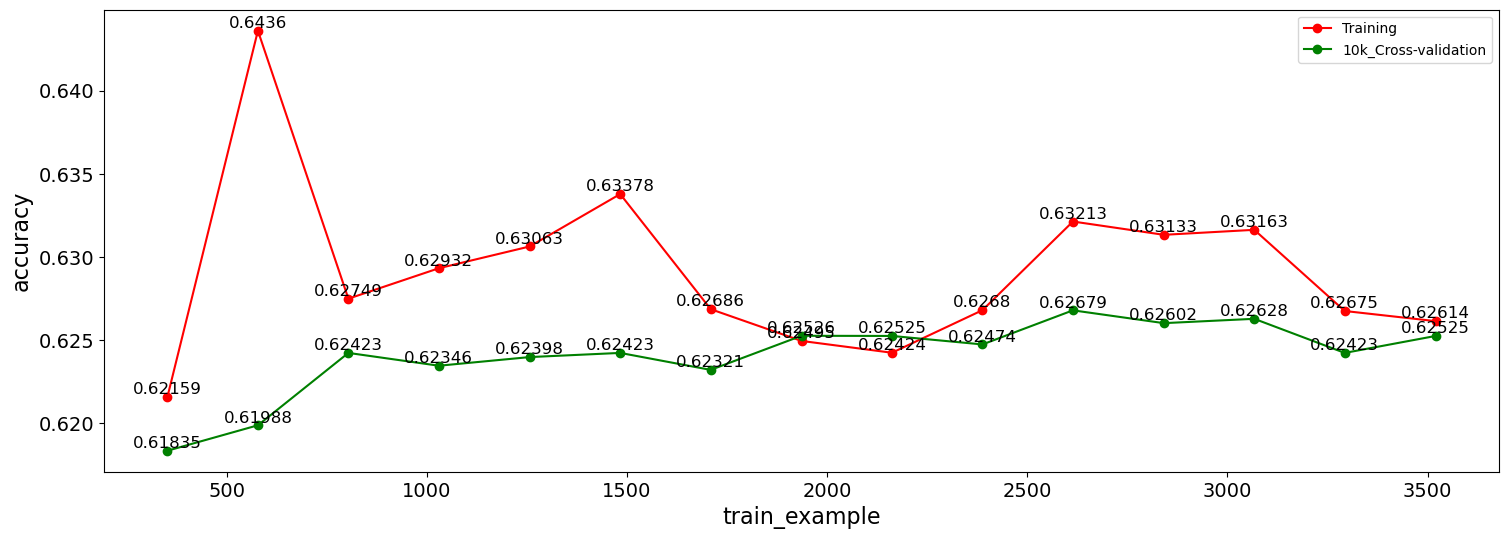

In [21]:
#学习曲线，查看对应不同训练数据量对模型的影响
#引入数据

k_num=10
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
train_size,train_acc,test_acc=learning_curve(
    classifier,Straindatas,train_labels,cv=k_num,scoring='accuracy',#neg_mean_squared_error
    train_sizes=np.linspace(0.1, 1.0, 15)
)


train_acc_mean= np.around(np.mean(train_acc,axis=1), decimals=5)
test_acc_mean=np.around(np.mean(test_acc,axis=1), decimals=5)
double_plot(train_size,train_acc_mean,test_acc_mean,'accuracy')

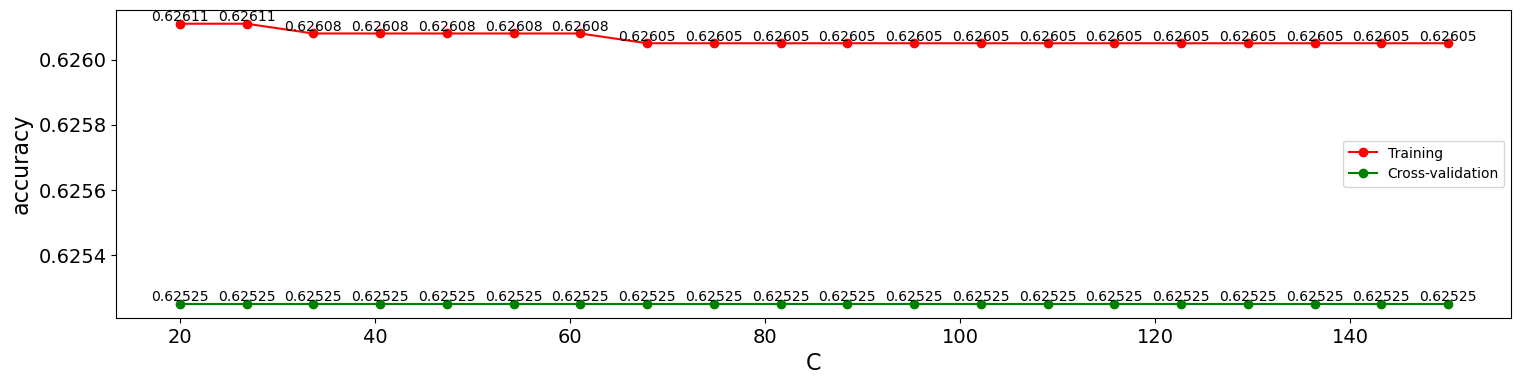

In [22]:
#验证曲线，对应正则化参数取值对模型的影响
import warnings
warnings.filterwarnings("ignore")
#改变param来观察Loss函数情况
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
param_range=np.linspace(20,150,20)

train_,test_=validation_curve(
    classifier,Straindatas,train_labels,param_name='C',param_range=param_range,cv=k_num,
    scoring='accuracy'#neg_mean_squared_error
)
train_mean=np.around(np.mean(train_,axis=1),decimals=5)
test_mean=np.around(np.mean(test_,axis=1),decimals=5)


plt.figure(figsize=(18, 4))
plt.title("")
plt.plot(param_range,train_mean,'o-',color='r',label='Training')
plt.plot(param_range,test_mean,'o-',color='g',label='Cross-validation')
plt.xlabel('C',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for a, b in zip(param_range, train_mean):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

for a, b in zip(param_range, test_mean):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

plt.legend(loc='best')
plt.show()


In [23]:
#使用逻辑回归
k_num=10
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
classifier.fit(Straindatas, train_labels)
L_acc = classifier.score(Svaliddatas,valid_labels)
L_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(L_acc,L_score.mean()))

验证集准确率：0.6278118609406953，10折交叉验证准确率0.6252544496059294


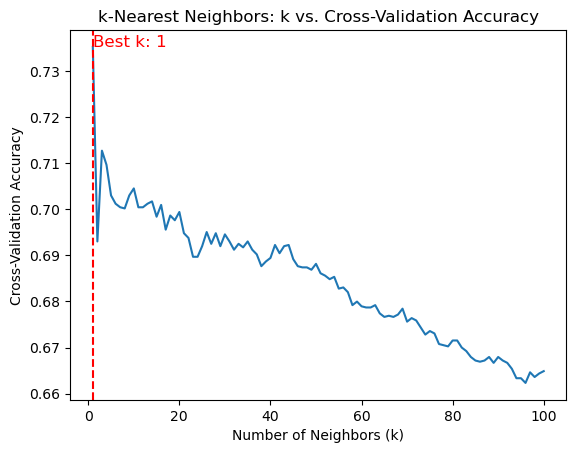

验证集准确率：0.6687116564417178，10折交叉验证准确率0.6648781251631087


In [24]:
#k近邻
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 101)
cv_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(Straindatas, train_labels)
    score = cross_val_score(classifier, Straindatas, train_labels, cv=k_num)
    cv_scores.append(score.mean())

# 找到最佳k值
best_k = k_range[np.argmax(cv_scores)]

# 绘制k值与交叉验证准确率的关系图
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-Nearest Neighbors: k vs. Cross-Validation Accuracy')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.text(best_k, max(cv_scores), f'Best k: {best_k}', fontsize=12, color='r')
plt.show()

K_acc = classifier.score(Svaliddatas,valid_labels)
K_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(K_acc,K_score.mean()))

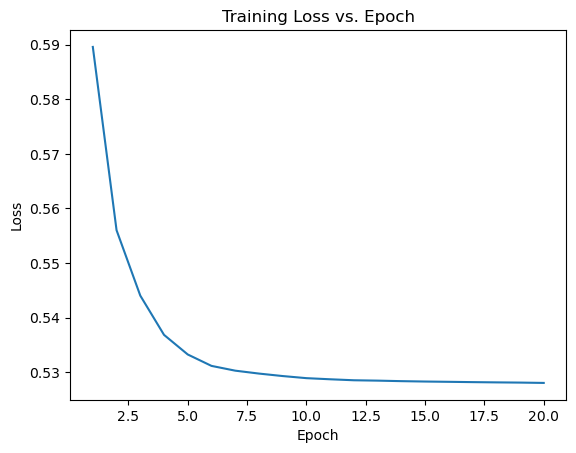

验证集准确率：0.7351738241308794，10折交叉验证准确率0.7206208570384677


In [25]:
#使用神经网络
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(40, 4), random_state=1, warm_start=True)

num_epochs = 20
losses=[]
# 训练过程
for epoch in range(num_epochs):
    classifier.fit(Straindatas, train_labels)
    predictions = classifier.predict_proba(Straindatas)
    loss = log_loss(train_labels, predictions)
    losses.append(loss)
    

# 绘制损失值随迭代次数的变化
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.show()

classifier=MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(40, 4), random_state=1)
classifier.fit(Straindatas, train_labels)
N_acc = classifier.score(Svaliddatas,valid_labels)
N_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(N_acc,N_score.mean()))

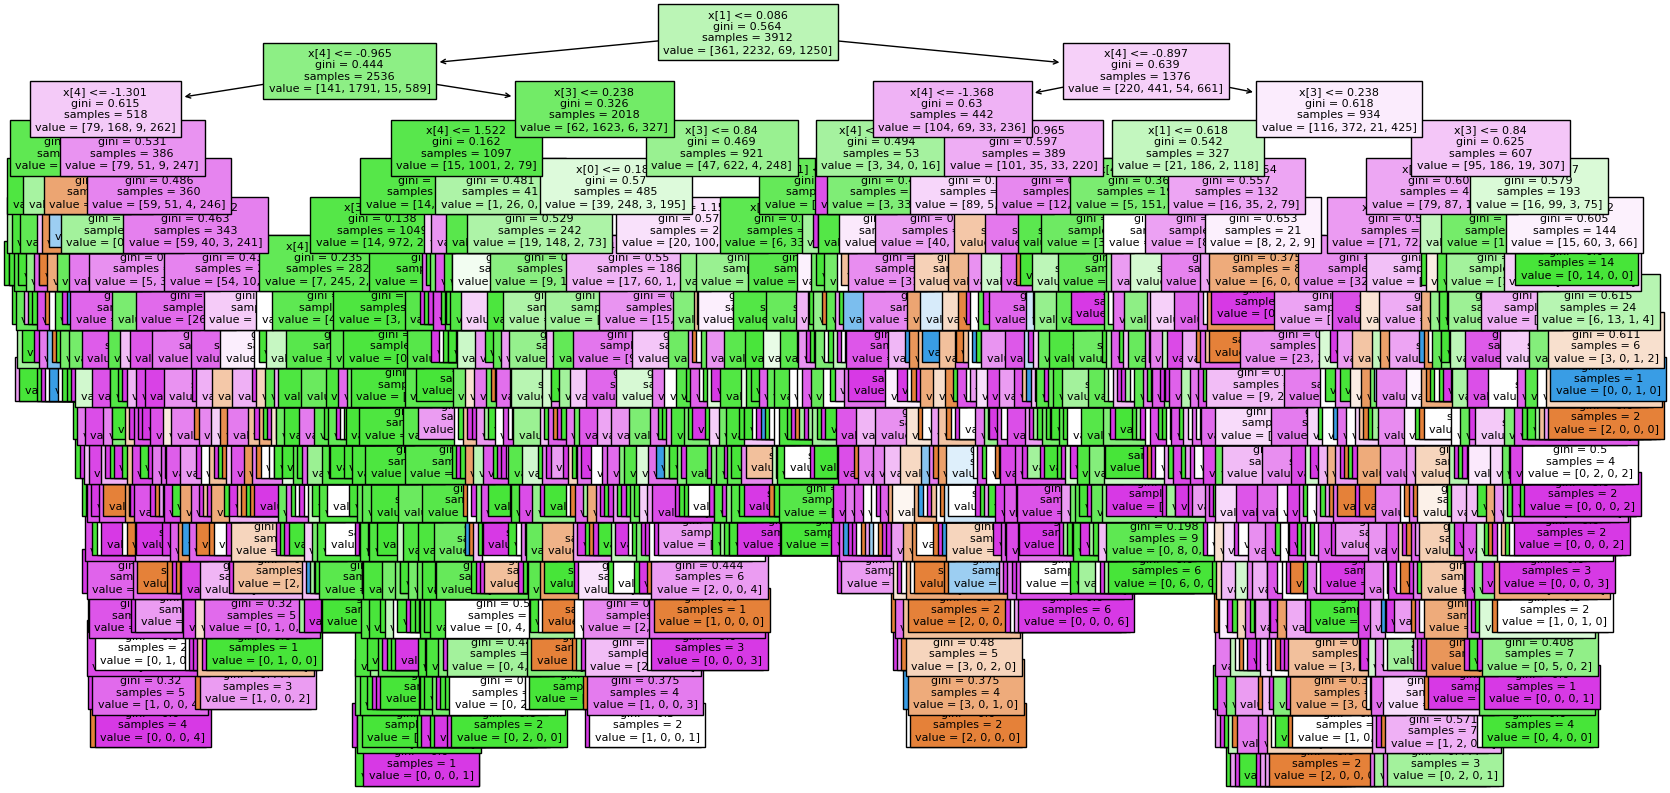

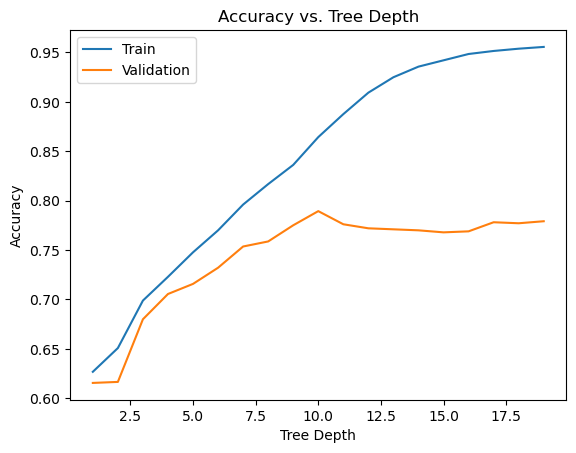

验证集准确率：0.7791411042944786，10折交叉验证准确率0.7471912678114724


In [26]:
#决策树

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


#分析树深度对训练集和验证集准确率的影响：
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 20)
train_accuracies = []
valid_accuracies = []

for max_depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=4, random_state=1)
    classifier.fit(Straindatas, train_labels)
    
    train_acc = classifier.score(Straindatas, train_labels)
    valid_acc = classifier.score(Svaliddatas, valid_labels)
    
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    
#绘制决策树   
plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, fontsize=8)
plt.show()

# 绘制训练集和验证集准确率随树深度的变化
plt.plot(max_depths, train_accuracies, label='Train')
plt.plot(max_depths, valid_accuracies, label='Validation')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.legend()
plt.show()

T_acc = classifier.score(Svaliddatas,valid_labels)
T_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(T_acc,T_score.mean()))

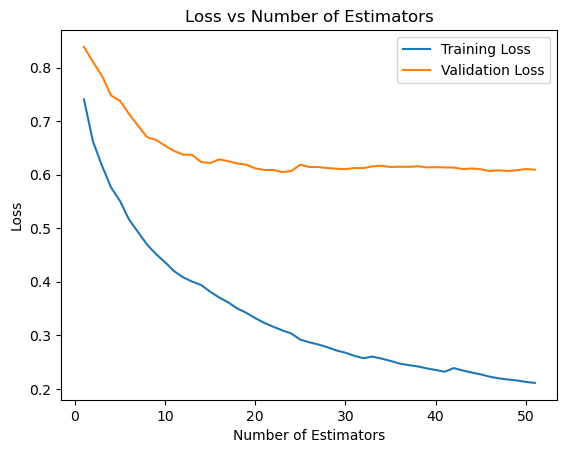

验证集准确率：0.8087934560327198，10折交叉验证准确率0.802659324599405


In [27]:
#梯度提升树
from sklearn.ensemble import GradientBoostingClassifier
#classifier=GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,max_depth=4, random_state=4)
classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=4, random_state=4, validation_fraction=0.1, n_iter_no_change=5)
classifier.fit(Straindatas, train_labels)

train_losses = []
val_losses = []
for train_preds, val_preds in zip(classifier.staged_predict_proba(Straindatas), classifier.staged_predict_proba(Svaliddatas)):
    train_loss = log_loss(train_labels, train_preds)
    val_loss = log_loss(valid_labels, val_preds)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Number of Estimators')
plt.show()

D_acc = classifier.score(Svaliddatas,valid_labels)
D_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(D_acc,D_score.mean()))

In [28]:
#SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
classifier =SVC(gamma='auto',C=0.55) 
classifier.fit(Straindatas, train_labels)
S_acc = classifier.score(Svaliddatas,valid_labels)
S_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(S_acc,S_score.mean()))


验证集准确率：0.66359918200409，10折交叉验证准确率0.6692122501174383


[19:38:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[0]	validation_0-merror:0.22239	validation_0-mlogloss:1.33323	validation_1-merror:0.25767	validation_1-mlogloss:1.33651
[1]	validation_0-merror:0.21421	validation_0-mlogloss:1.28506	validation_1-merror:0.25665	validation_1-mlogloss:1.29161
[2]	validation_0-merror:0.21012	validation_0-mlogloss:1.24040	validation_1-merror:0.25153	validation_1-mlogloss:1.25055
[3]	validation_0-merror:0.20910	validation_0-mlogloss:1.20004	validation_1-merror:0.24949	validation_1-mlogloss:1.21311
[4]	validation_0-merror:0.20859	validation_0-mlogloss:1.16233	validation_1-merror:0.24029	validation_1-mlogloss:1.17836
[5]	validation_0-merror:0.20706	validation_0-mlogloss:1.12674	validation_1-merror:0.23620	validation_1-mlogloss:1.14603
[6]	validation_0-merror:0.20654	validation_0-mlogloss:1.09380	validation_1-merror:0.23722	validation_1-mlogloss

[67]	validation_0-merror:0.15261	validation_0-mlogloss:0.47529	validation_1-merror:0.20552	validation_1-mlogloss:0.58929
[68]	validation_0-merror:0.15210	validation_0-mlogloss:0.47250	validation_1-merror:0.20654	validation_1-mlogloss:0.58696
[69]	validation_0-merror:0.15082	validation_0-mlogloss:0.46967	validation_1-merror:0.20654	validation_1-mlogloss:0.58513
[70]	validation_0-merror:0.15107	validation_0-mlogloss:0.46661	validation_1-merror:0.20654	validation_1-mlogloss:0.58308
[71]	validation_0-merror:0.15107	validation_0-mlogloss:0.46370	validation_1-merror:0.20552	validation_1-mlogloss:0.58116
[72]	validation_0-merror:0.14801	validation_0-mlogloss:0.46006	validation_1-merror:0.20245	validation_1-mlogloss:0.57836
[73]	validation_0-merror:0.14826	validation_0-mlogloss:0.45739	validation_1-merror:0.20348	validation_1-mlogloss:0.57666
[74]	validation_0-merror:0.14724	validation_0-mlogloss:0.45517	validation_1-merror:0.20245	validation_1-mlogloss:0.57528
[75]	validation_0-merror:0.14749

[135]	validation_0-merror:0.11324	validation_0-mlogloss:0.34913	validation_1-merror:0.18609	validation_1-mlogloss:0.50541
[136]	validation_0-merror:0.11273	validation_0-mlogloss:0.34820	validation_1-merror:0.18507	validation_1-mlogloss:0.50488
[137]	validation_0-merror:0.11247	validation_0-mlogloss:0.34684	validation_1-merror:0.18405	validation_1-mlogloss:0.50352
[138]	validation_0-merror:0.11196	validation_0-mlogloss:0.34581	validation_1-merror:0.18405	validation_1-mlogloss:0.50293
[139]	validation_0-merror:0.11171	validation_0-mlogloss:0.34458	validation_1-merror:0.18507	validation_1-mlogloss:0.50193
[140]	validation_0-merror:0.11094	validation_0-mlogloss:0.34318	validation_1-merror:0.18303	validation_1-mlogloss:0.50108
[141]	validation_0-merror:0.11145	validation_0-mlogloss:0.34239	validation_1-merror:0.18200	validation_1-mlogloss:0.50059
[142]	validation_0-merror:0.10992	validation_0-mlogloss:0.34153	validation_1-merror:0.18200	validation_1-mlogloss:0.50043
[143]	validation_0-merro

[203]	validation_0-merror:0.09279	validation_0-mlogloss:0.29058	validation_1-merror:0.18098	validation_1-mlogloss:0.47593
[204]	validation_0-merror:0.09279	validation_0-mlogloss:0.28990	validation_1-merror:0.18303	validation_1-mlogloss:0.47576
[205]	validation_0-merror:0.09254	validation_0-mlogloss:0.28873	validation_1-merror:0.18405	validation_1-mlogloss:0.47531
[206]	validation_0-merror:0.09254	validation_0-mlogloss:0.28769	validation_1-merror:0.18303	validation_1-mlogloss:0.47480
[207]	validation_0-merror:0.09202	validation_0-mlogloss:0.28694	validation_1-merror:0.18303	validation_1-mlogloss:0.47452
[208]	validation_0-merror:0.09202	validation_0-mlogloss:0.28636	validation_1-merror:0.18303	validation_1-mlogloss:0.47411
[209]	validation_0-merror:0.09228	validation_0-mlogloss:0.28576	validation_1-merror:0.18303	validation_1-mlogloss:0.47384
[210]	validation_0-merror:0.09151	validation_0-mlogloss:0.28485	validation_1-merror:0.18303	validation_1-mlogloss:0.47373
[211]	validation_0-merro

[271]	validation_0-merror:0.07771	validation_0-mlogloss:0.25184	validation_1-merror:0.17382	validation_1-mlogloss:0.46126
[272]	validation_0-merror:0.07771	validation_0-mlogloss:0.25126	validation_1-merror:0.17382	validation_1-mlogloss:0.46113
[273]	validation_0-merror:0.07745	validation_0-mlogloss:0.25077	validation_1-merror:0.17485	validation_1-mlogloss:0.46122
[274]	validation_0-merror:0.07720	validation_0-mlogloss:0.25026	validation_1-merror:0.17280	validation_1-mlogloss:0.46123
[275]	validation_0-merror:0.07720	validation_0-mlogloss:0.24986	validation_1-merror:0.17178	validation_1-mlogloss:0.46107
[276]	validation_0-merror:0.07771	validation_0-mlogloss:0.24928	validation_1-merror:0.17280	validation_1-mlogloss:0.46095
[277]	validation_0-merror:0.07771	validation_0-mlogloss:0.24883	validation_1-merror:0.17280	validation_1-mlogloss:0.46076
[278]	validation_0-merror:0.07720	validation_0-mlogloss:0.24837	validation_1-merror:0.17280	validation_1-mlogloss:0.46041
[279]	validation_0-merro

[339]	validation_0-merror:0.06442	validation_0-mlogloss:0.22330	validation_1-merror:0.16871	validation_1-mlogloss:0.45528
[340]	validation_0-merror:0.06467	validation_0-mlogloss:0.22309	validation_1-merror:0.16769	validation_1-mlogloss:0.45525
[341]	validation_0-merror:0.06416	validation_0-mlogloss:0.22275	validation_1-merror:0.16871	validation_1-mlogloss:0.45520
[342]	validation_0-merror:0.06314	validation_0-mlogloss:0.22251	validation_1-merror:0.16769	validation_1-mlogloss:0.45507
[343]	validation_0-merror:0.06263	validation_0-mlogloss:0.22224	validation_1-merror:0.16871	validation_1-mlogloss:0.45513
[344]	validation_0-merror:0.06212	validation_0-mlogloss:0.22198	validation_1-merror:0.16769	validation_1-mlogloss:0.45484
[345]	validation_0-merror:0.06186	validation_0-mlogloss:0.22168	validation_1-merror:0.16871	validation_1-mlogloss:0.45479
[346]	validation_0-merror:0.06186	validation_0-mlogloss:0.22137	validation_1-merror:0.16871	validation_1-mlogloss:0.45474
[347]	validation_0-merro

[407]	validation_0-merror:0.05189	validation_0-mlogloss:0.20336	validation_1-merror:0.16667	validation_1-mlogloss:0.45238
[408]	validation_0-merror:0.05112	validation_0-mlogloss:0.20321	validation_1-merror:0.16667	validation_1-mlogloss:0.45241
[409]	validation_0-merror:0.05087	validation_0-mlogloss:0.20295	validation_1-merror:0.16667	validation_1-mlogloss:0.45213
[410]	validation_0-merror:0.05112	validation_0-mlogloss:0.20258	validation_1-merror:0.16667	validation_1-mlogloss:0.45215
[411]	validation_0-merror:0.05087	validation_0-mlogloss:0.20234	validation_1-merror:0.16667	validation_1-mlogloss:0.45205
[412]	validation_0-merror:0.05036	validation_0-mlogloss:0.20201	validation_1-merror:0.16667	validation_1-mlogloss:0.45197
[413]	validation_0-merror:0.05036	validation_0-mlogloss:0.20183	validation_1-merror:0.16667	validation_1-mlogloss:0.45203
[414]	validation_0-merror:0.05061	validation_0-mlogloss:0.20157	validation_1-merror:0.16871	validation_1-mlogloss:0.45181
[415]	validation_0-merro

[475]	validation_0-merror:0.04652	validation_0-mlogloss:0.18695	validation_1-merror:0.16360	validation_1-mlogloss:0.45084
[476]	validation_0-merror:0.04627	validation_0-mlogloss:0.18680	validation_1-merror:0.16360	validation_1-mlogloss:0.45086
[477]	validation_0-merror:0.04627	validation_0-mlogloss:0.18661	validation_1-merror:0.16258	validation_1-mlogloss:0.45083
[478]	validation_0-merror:0.04652	validation_0-mlogloss:0.18647	validation_1-merror:0.16462	validation_1-mlogloss:0.45072
[479]	validation_0-merror:0.04601	validation_0-mlogloss:0.18637	validation_1-merror:0.16462	validation_1-mlogloss:0.45080
[480]	validation_0-merror:0.04627	validation_0-mlogloss:0.18618	validation_1-merror:0.16462	validation_1-mlogloss:0.45082
[481]	validation_0-merror:0.04627	validation_0-mlogloss:0.18599	validation_1-merror:0.16462	validation_1-mlogloss:0.45077
[482]	validation_0-merror:0.04525	validation_0-mlogloss:0.18578	validation_1-merror:0.16258	validation_1-mlogloss:0.45084
[483]	validation_0-merro

[543]	validation_0-merror:0.04167	validation_0-mlogloss:0.17447	validation_1-merror:0.16564	validation_1-mlogloss:0.44891
[544]	validation_0-merror:0.04090	validation_0-mlogloss:0.17428	validation_1-merror:0.16462	validation_1-mlogloss:0.44891
[545]	validation_0-merror:0.04116	validation_0-mlogloss:0.17410	validation_1-merror:0.16564	validation_1-mlogloss:0.44920
[546]	validation_0-merror:0.04090	validation_0-mlogloss:0.17401	validation_1-merror:0.16462	validation_1-mlogloss:0.44928
[547]	validation_0-merror:0.04064	validation_0-mlogloss:0.17383	validation_1-merror:0.16564	validation_1-mlogloss:0.44920
[548]	validation_0-merror:0.04064	validation_0-mlogloss:0.17369	validation_1-merror:0.16564	validation_1-mlogloss:0.44925
[549]	validation_0-merror:0.04064	validation_0-mlogloss:0.17356	validation_1-merror:0.16564	validation_1-mlogloss:0.44921
[550]	validation_0-merror:0.04090	validation_0-mlogloss:0.17338	validation_1-merror:0.16564	validation_1-mlogloss:0.44907
[551]	validation_0-merro

[611]	validation_0-merror:0.03553	validation_0-mlogloss:0.16405	validation_1-merror:0.16053	validation_1-mlogloss:0.44909
[612]	validation_0-merror:0.03553	validation_0-mlogloss:0.16389	validation_1-merror:0.16053	validation_1-mlogloss:0.44930
[613]	validation_0-merror:0.03528	validation_0-mlogloss:0.16379	validation_1-merror:0.16053	validation_1-mlogloss:0.44934
[614]	validation_0-merror:0.03553	validation_0-mlogloss:0.16368	validation_1-merror:0.16053	validation_1-mlogloss:0.44932
[615]	validation_0-merror:0.03528	validation_0-mlogloss:0.16352	validation_1-merror:0.16155	validation_1-mlogloss:0.44925
[616]	validation_0-merror:0.03528	validation_0-mlogloss:0.16346	validation_1-merror:0.16155	validation_1-mlogloss:0.44914
[617]	validation_0-merror:0.03553	validation_0-mlogloss:0.16324	validation_1-merror:0.16053	validation_1-mlogloss:0.44935
[618]	validation_0-merror:0.03476	validation_0-mlogloss:0.16302	validation_1-merror:0.16155	validation_1-mlogloss:0.44947
[619]	validation_0-merro

[679]	validation_0-merror:0.03221	validation_0-mlogloss:0.15576	validation_1-merror:0.16564	validation_1-mlogloss:0.45030
[680]	validation_0-merror:0.03221	validation_0-mlogloss:0.15568	validation_1-merror:0.16462	validation_1-mlogloss:0.45017
[681]	validation_0-merror:0.03221	validation_0-mlogloss:0.15552	validation_1-merror:0.16462	validation_1-mlogloss:0.45016
[682]	validation_0-merror:0.03221	validation_0-mlogloss:0.15547	validation_1-merror:0.16462	validation_1-mlogloss:0.45025
[683]	validation_0-merror:0.03221	validation_0-mlogloss:0.15536	validation_1-merror:0.16564	validation_1-mlogloss:0.45027
[684]	validation_0-merror:0.03195	validation_0-mlogloss:0.15520	validation_1-merror:0.16564	validation_1-mlogloss:0.45026
[685]	validation_0-merror:0.03195	validation_0-mlogloss:0.15498	validation_1-merror:0.16564	validation_1-mlogloss:0.45012
[686]	validation_0-merror:0.03195	validation_0-mlogloss:0.15488	validation_1-merror:0.16564	validation_1-mlogloss:0.45023
[687]	validation_0-merro

[747]	validation_0-merror:0.02991	validation_0-mlogloss:0.14866	validation_1-merror:0.16462	validation_1-mlogloss:0.45141
[748]	validation_0-merror:0.02965	validation_0-mlogloss:0.14860	validation_1-merror:0.16462	validation_1-mlogloss:0.45145
[749]	validation_0-merror:0.02940	validation_0-mlogloss:0.14843	validation_1-merror:0.16462	validation_1-mlogloss:0.45156
[750]	validation_0-merror:0.02965	validation_0-mlogloss:0.14829	validation_1-merror:0.16462	validation_1-mlogloss:0.45142
[751]	validation_0-merror:0.02914	validation_0-mlogloss:0.14817	validation_1-merror:0.16462	validation_1-mlogloss:0.45151
[752]	validation_0-merror:0.02889	validation_0-mlogloss:0.14811	validation_1-merror:0.16462	validation_1-mlogloss:0.45145
[753]	validation_0-merror:0.02914	validation_0-mlogloss:0.14805	validation_1-merror:0.16462	validation_1-mlogloss:0.45135
[754]	validation_0-merror:0.02914	validation_0-mlogloss:0.14792	validation_1-merror:0.16462	validation_1-mlogloss:0.45132
[755]	validation_0-merro

[815]	validation_0-merror:0.02710	validation_0-mlogloss:0.14245	validation_1-merror:0.16258	validation_1-mlogloss:0.45267
[816]	validation_0-merror:0.02684	validation_0-mlogloss:0.14233	validation_1-merror:0.16258	validation_1-mlogloss:0.45279
[817]	validation_0-merror:0.02684	validation_0-mlogloss:0.14221	validation_1-merror:0.16258	validation_1-mlogloss:0.45265
[818]	validation_0-merror:0.02684	validation_0-mlogloss:0.14216	validation_1-merror:0.16258	validation_1-mlogloss:0.45261
[819]	validation_0-merror:0.02633	validation_0-mlogloss:0.14208	validation_1-merror:0.16360	validation_1-mlogloss:0.45257
[820]	validation_0-merror:0.02633	validation_0-mlogloss:0.14200	validation_1-merror:0.16360	validation_1-mlogloss:0.45259
[821]	validation_0-merror:0.02658	validation_0-mlogloss:0.14188	validation_1-merror:0.16360	validation_1-mlogloss:0.45248
[822]	validation_0-merror:0.02658	validation_0-mlogloss:0.14178	validation_1-merror:0.16360	validation_1-mlogloss:0.45254
[823]	validation_0-merro

[883]	validation_0-merror:0.02531	validation_0-mlogloss:0.13756	validation_1-merror:0.16258	validation_1-mlogloss:0.45352
[884]	validation_0-merror:0.02531	validation_0-mlogloss:0.13746	validation_1-merror:0.16258	validation_1-mlogloss:0.45344
[885]	validation_0-merror:0.02556	validation_0-mlogloss:0.13741	validation_1-merror:0.16258	validation_1-mlogloss:0.45347
[886]	validation_0-merror:0.02531	validation_0-mlogloss:0.13733	validation_1-merror:0.16258	validation_1-mlogloss:0.45352
[887]	validation_0-merror:0.02531	validation_0-mlogloss:0.13729	validation_1-merror:0.16258	validation_1-mlogloss:0.45347
[888]	validation_0-merror:0.02531	validation_0-mlogloss:0.13724	validation_1-merror:0.16258	validation_1-mlogloss:0.45356
[889]	validation_0-merror:0.02505	validation_0-mlogloss:0.13718	validation_1-merror:0.16258	validation_1-mlogloss:0.45348
[890]	validation_0-merror:0.02505	validation_0-mlogloss:0.13714	validation_1-merror:0.16258	validation_1-mlogloss:0.45354
[891]	validation_0-merro

[951]	validation_0-merror:0.02326	validation_0-mlogloss:0.13352	validation_1-merror:0.16258	validation_1-mlogloss:0.45405
[952]	validation_0-merror:0.02352	validation_0-mlogloss:0.13350	validation_1-merror:0.16258	validation_1-mlogloss:0.45407
[953]	validation_0-merror:0.02326	validation_0-mlogloss:0.13340	validation_1-merror:0.16258	validation_1-mlogloss:0.45421
[954]	validation_0-merror:0.02326	validation_0-mlogloss:0.13338	validation_1-merror:0.16258	validation_1-mlogloss:0.45419
[955]	validation_0-merror:0.02326	validation_0-mlogloss:0.13337	validation_1-merror:0.16258	validation_1-mlogloss:0.45419
[956]	validation_0-merror:0.02326	validation_0-mlogloss:0.13334	validation_1-merror:0.16258	validation_1-mlogloss:0.45424
[957]	validation_0-merror:0.02326	validation_0-mlogloss:0.13330	validation_1-merror:0.16258	validation_1-mlogloss:0.45436
[958]	validation_0-merror:0.02326	validation_0-mlogloss:0.13325	validation_1-merror:0.16258	validation_1-mlogloss:0.45420
[959]	validation_0-merro

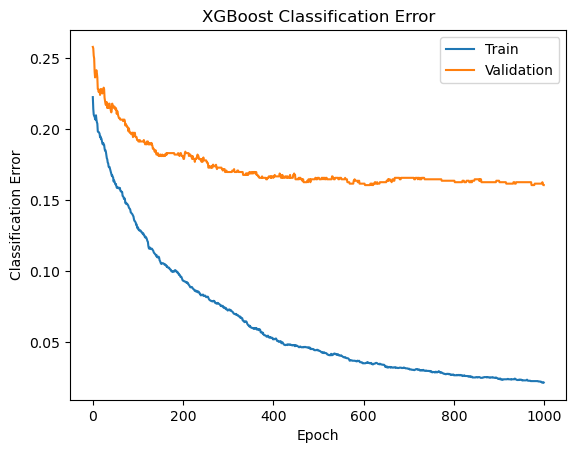

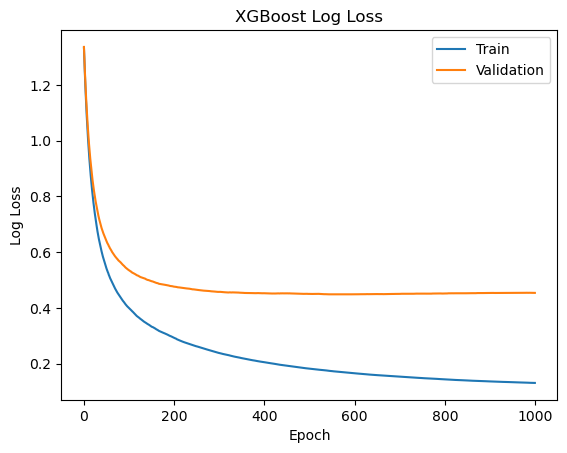

[19:38:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[19:38:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[19:38:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[19:39:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[19:39:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } are not used.

[19:39:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight" } a

In [29]:
#Xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

eval_set = [(Straindatas, train_labels), (Svaliddatas, valid_labels)]

classifier = XGBClassifier(learning_rate=0.05,
                      n_estimators=1000,
                      max_depth=6,
                      min_child_weight=2,
                      gamma=0.5,
                      subsample=0.8,
                      colsample_btree=0.8,
                      objective='multi:softmax',
                      scale_pos_weight=1,
                      random_state=27)
classifier.fit(Straindatas, train_labels, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)

# 获取验证结果
results = classifier.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# 绘制分类错误率
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epoch')
plt.title('XGBoost Classification Error')
plt.show()

# 绘制对数损失
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.title('XGBoost Log Loss')
plt.show()

X_acc = classifier.score(Svaliddatas,valid_labels)
X_score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(X_acc,X_score.mean()))

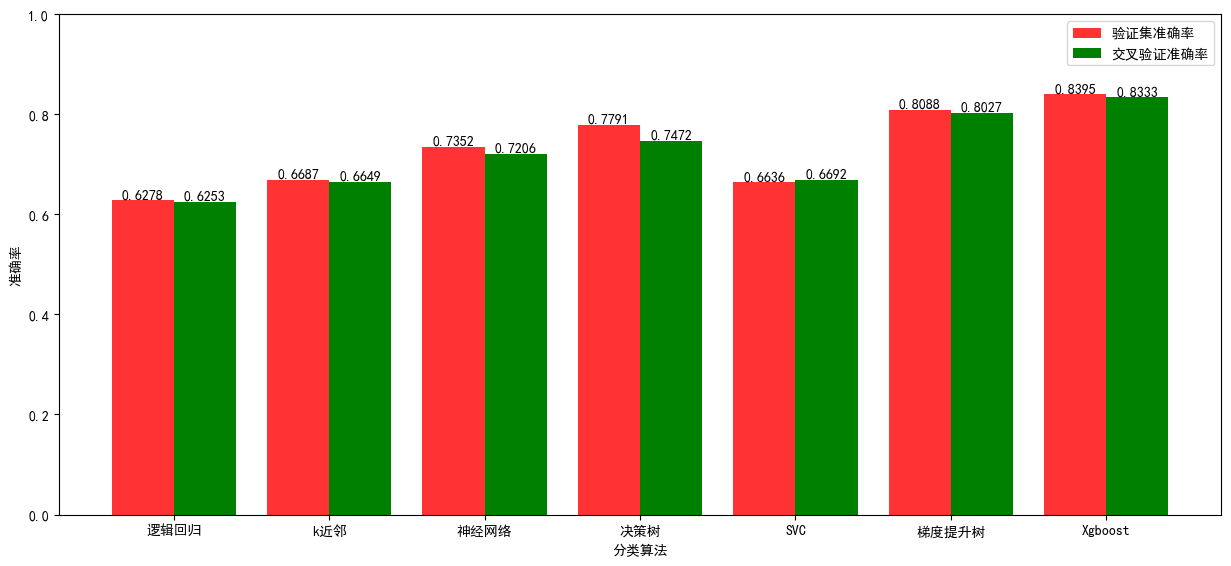

In [30]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6.5))



label_list=['逻辑回归','k近邻','神经网络','决策树','SVC','梯度提升树','Xgboost']
num_list1 = [L_acc, K_acc, N_acc, T_acc, S_acc, D_acc, X_acc]
num_list2 = [L_score.mean(), K_score.mean(), N_score.mean(), T_score.mean(), S_score.mean(), D_score.mean(), X_score.mean()]


num_list1_rounded = [round(n, 4) for n in num_list1]
num_list2_rounded = [round(n, 4) for n in num_list2]

x = range(len(num_list1))

rects1 = plt.bar(x=x, height=num_list1_rounded, width=0.4, alpha=0.8, color='red', label="验证集准确率")
rects2 = plt.bar(x=[i + 0.4 for i in x], height=num_list2_rounded, width=0.4, color='green', label="交叉验证准确率")
plt.ylim(0, 1)    
plt.ylabel("准确率")

plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("分类算法")

plt.legend()     

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()
